# AMAZON PRIME DATASET ANALYSIS

In this project, we will analyze which language movies have the highest ratings, the years they were released, and their maturity ratings. To do this, we have downloaded a dataset from Kaggle that contains 8,127 rows and 7 columns.

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
dataset=pd.read_csv('amazon_prime.csv')

In [3]:
#Checking whehter the dataset has been properly imported or nor
dataset

,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Plot
0,John Rambo,Tamil,7,1 h 26 min,2008,18+,"In Thailand, John Rambo joins a group of merce..."
1,American Pie,English,7,1 h 35 min,1999,18+,You'll never look at warm apple pie the same w...
2,Bombshell,English,6.8,1 h 48 min,2019,18+,"The provocative real story of three smart, amb..."
3,Love Birds,Tamil,5.1,2 h 40 min,1996,All,"After accidentally meeting, Mridula (Nagma) an..."
4,Hippi,Telugu,5,2 h 20 min,2019,18+,Hippi is about the live-in relationship betwee...
...,...,...,...,...,...,...,...
8122,Blackout,English,5.2,1 h 31 min,2014,18+,This ensemble thriller tells the story of four...
8123,Loafer,Hindi,6.5,2 h 3 min,1973,All,Loafer Is A Bollywood Romantic Drama Hindi Mov...
8124,Remember Me,English,7.1,1 h 52 min,2010,13+,Two people scarred by grief find happiness in ...
8125,Khopa,Marathi,None,1 h 51 mins,2017,13+,Narya who comes from a loving and respected fa...


In [4]:
#checking for the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8127 entries, 0 to 8126
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Movie Name       8127 non-null   object
 1   Language         8127 non-null   object
 2   IMDb Rating      8127 non-null   object
 3   Running Time     8127 non-null   object
 4   Year of Release  8127 non-null   object
 5   Maturity Rating  8127 non-null   object
 6   Plot             8125 non-null   object
dtypes: object(7)
memory usage: 444.6+ KB


In [5]:
dataset.isnull().sum()

Movie Name         0
Language           0
IMDb Rating        0
Running Time       0
Year of Release    0
Maturity Rating    0
Plot               2
dtype: int64

# Data Cleaning & Visualizing

In [6]:
#Counting values in a dataset
dataset['Movie Name'].value_counts()

The Landlord                      8
SkyBound                          8
Flight 192                        8
Abduction Point                   7
Transformers: Dark of the Moon    6
                                 ..
Dava Dava                         1
Vetagadu                          1
Backstabbing for Beginners        1
Ekhonee                           1
Khandani Shafakhana               1
Name: Movie Name, Length: 7261, dtype: int64

In [7]:
dataset['Language'].value_counts()

Hindi        1982
English      1699
Bengali      1201
Telugu        987
Tamil         721
Malayalam     518
Kannada       419
Marathi       353
Punjabi       133
Gujarati      114
Name: Language, dtype: int64

Text(0.5, 0.98, 'Language Data.')

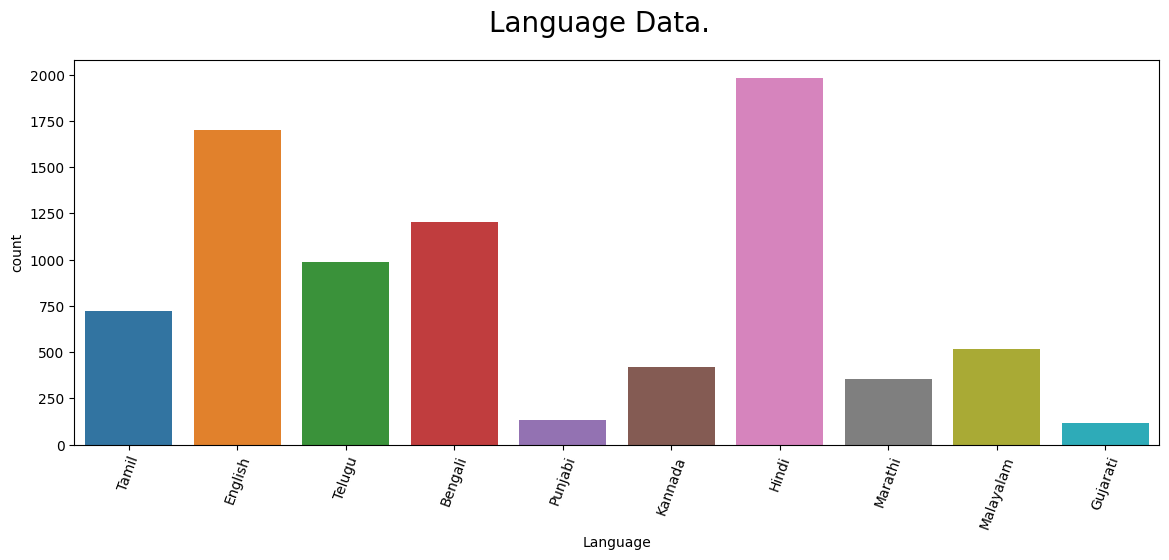

In [8]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='Language')
plt.xticks(rotation=70)
plt.suptitle('Language Data.',fontsize=20)

From the above chart we can clearly see that Hindi films are the most released film as per the dataset

In [9]:
dataset['IMDb Rating'] = dataset['IMDb Rating'].replace('None',5)

In [10]:
dataset['IMDb Rating'] = dataset['IMDb Rating'].replace('         None',5)

In [11]:
dataset['IMDb Rating'].value_counts()

5      2008
6.5     233
6.4     210
6.6     208
6.2     202
       ... 
9.5       1
1.7       1
9.1       1
1.5       1
9.3       1
Name: IMDb Rating, Length: 82, dtype: int64

In [12]:
extract_ratio= dataset.loc[dataset['IMDb Rating']=='         None']

In [13]:
dataset['IMDb Rating']=dataset['IMDb Rating'].astype(float)

In [14]:
dataset['IMDb Rating']=dataset['IMDb Rating'].round()

In [15]:
dataset['IMDb Rating']=dataset['IMDb Rating'].astype(int)

In [16]:
dataset.dtypes

Movie Name         object
Language           object
IMDb Rating         int32
Running Time       object
Year of Release    object
Maturity Rating    object
Plot               object
dtype: object

In [17]:
dataset['Running Time'].value_counts()

2 h 17 min     144
2 h 18 min     138
2 h 19 min     123
2 h 14 min     119
2 h 20 min     119
              ... 
3 h 15 min       1
2 h 54 mins      1
1 h 22 mins      1
2 h 38 mins      1
29min            1
Name: Running Time, Length: 289, dtype: int64

In [18]:
def convert_to_minutes(time_str):
    try:
        h, m = time_str.split('h')
        return int(h.strip()) * 60 + int(m.strip().replace('min', ''))
    except:
        return np.nan

# Assuming your dataset is already loaded as 'dataset'
dataset['Running Time'] = dataset['Running Time'].apply(convert_to_minutes)

In [19]:
dataset['Running Time'].isnull().sum()

1122

In [20]:
run_avg=dataset['Running Time'].mean()
run_avg

123.69921484653818

In [21]:
dataset['Running Time']=dataset['Running Time'].fillna(123.69)

In [22]:
dataset['Running Time']=dataset['Running Time'].round()

In [23]:
dataset['Running Time'].value_counts()

124.0    1227
137.0     144
138.0     138
139.0     123
134.0     119
         ... 
193.0       1
205.0       1
191.0       1
209.0       1
200.0       1
Name: Running Time, Length: 142, dtype: int64

Text(0.5, 0.98, 'Running time Plot')

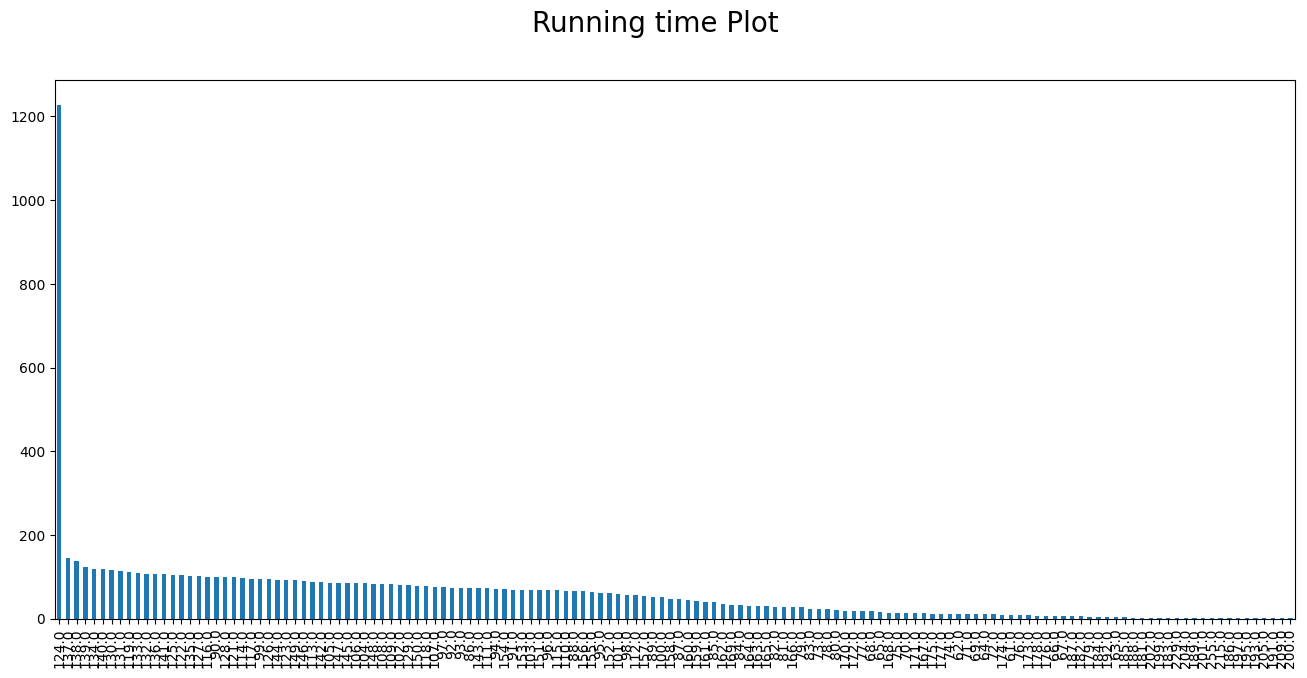

In [24]:
dataset['Running Time'].value_counts().plot(kind='bar',figsize=(16,7))
plt.suptitle('Running time Plot',fontsize=20)

As of the above barchart can clearly see that most of the movies running time is 124 min.

In [25]:
dataset['Year of Release']=dataset['Year of Release'].replace('None',2000)

In [26]:
dataset['Year of Release']=dataset['Year of Release'].astype(int)

In [27]:
dataset['Year of Release'].value_counts()

2017    762
2019    730
2018    579
2020    558
2000    493
       ... 
1956      1
1961      1
1952      1
1954      1
1959      1
Name: Year of Release, Length: 68, dtype: int64

Text(0.5, 0.98, 'Year Of Release')

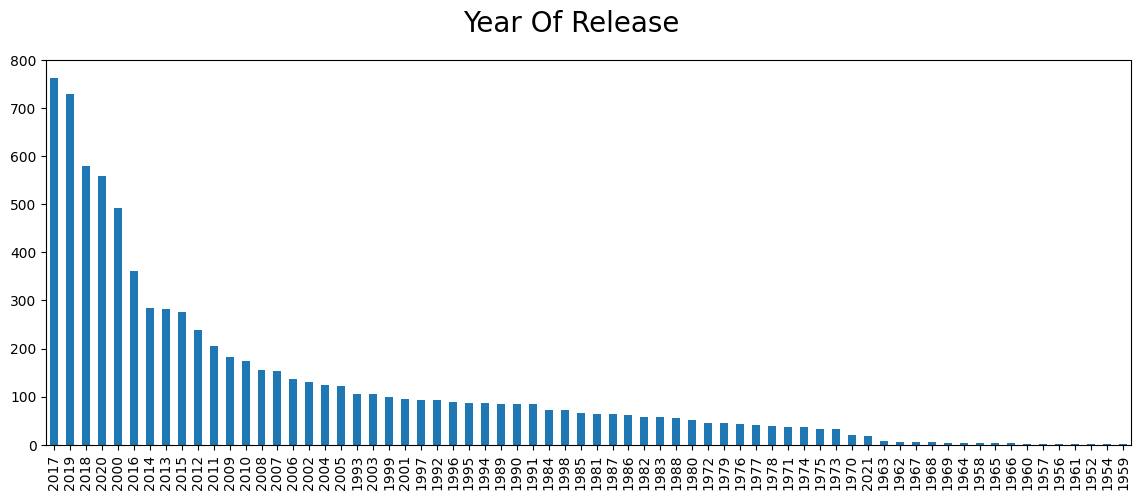

In [28]:
dataset['Year of Release'].value_counts().plot(kind='bar',figsize=(14,5))
plt.suptitle('Year Of Release',fontsize=20)

From the above barchart we can clearly see that most of the film in the dataset has been released on 2017.

In [29]:
dataset['Maturity Rating'].value_counts()

13+    2606
NR     2054
All    1762
18+    1138
16+     382
7+      185
Name: Maturity Rating, dtype: int64

Text(0.5, 0.98, 'Maturity Rating in the dataset')

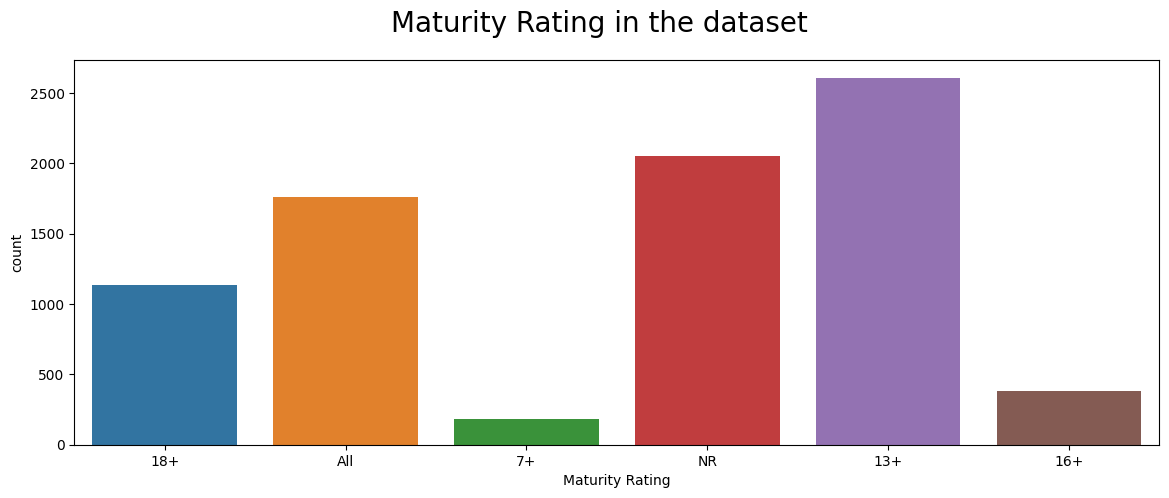

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='Maturity Rating')
plt.suptitle('Maturity Rating in the dataset',fontsize=20)

From the above chart we can clearly see that most of the films in the dataset are 13+ rated films.

In [31]:
#Filling the missing dataset using fillna function from pandas.
dataset['Plot']=dataset['Plot'].fillna('A group of hikers on the Appalachian Trail become lost and stumble across an ancient Alien secret that threatens their survival')

In [32]:
dataset['Plot'].isnull().sum()

0

In [33]:
dataset['Plot'].value_counts()

Five plan passengers are unable to land after a mysterious disaster happens on the ground, but they may be in worse danger than they thought when a stowaway is discovered on board carrying a dangerous secret.                                                                                                                                                                                          8
An FBI agent has her family taken hostage while she is on a flight to Washington DC. The agent then has to make a decision that could cost the lives of her husband and her son.                                                                                                                                                                                                                          8
Alyssa moves into a luxury apartment complex but is unaware she is being watched by her disturbed landlord, Robert, via hidden cameras. Robert will do anything to fill the void left by his estranged daughter-

Text(0.5, 0.98, 'Distribution of IMDb Ratings')

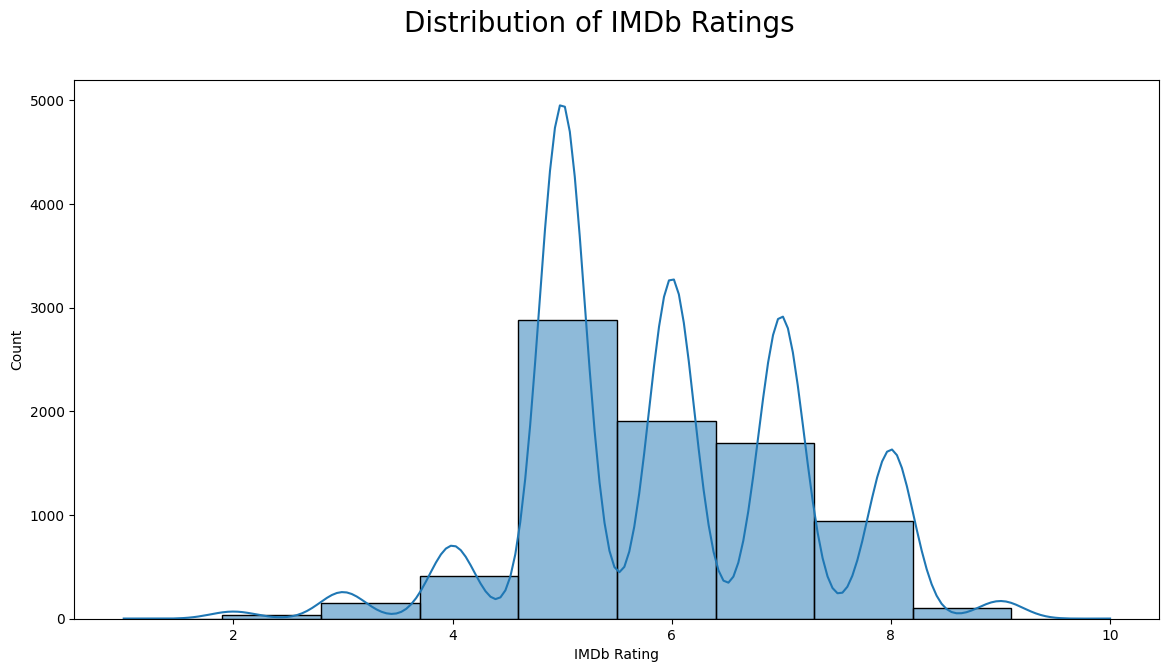

In [34]:
plt.figure(figsize=(14,7))
sns.histplot(dataset['IMDb Rating'], bins=10, kde=True)
plt.suptitle('Distribution of IMDb Ratings',fontsize=20)

In [35]:
mean_value=dataset['IMDb Rating'].mean()

In [36]:
mean_value

5.94770518026332

# Grouping & Aggregation

In [37]:
# Average IMDb Rating by Language
avg_rating_by_language = dataset.groupby('Language')['IMDb Rating'].mean().sort_values(ascending=False)
avg_rating_by_language

Language
Marathi      6.305949
English      6.043555
Kannada      6.042959
Malayalam    5.984556
Tamil        5.972261
Telugu       5.960486
Gujarati     5.938596
Hindi        5.879415
Punjabi      5.849624
Bengali      5.756869
Name: IMDb Rating, dtype: float64

Text(0.5, 0.98, 'Average Rating among Language.')

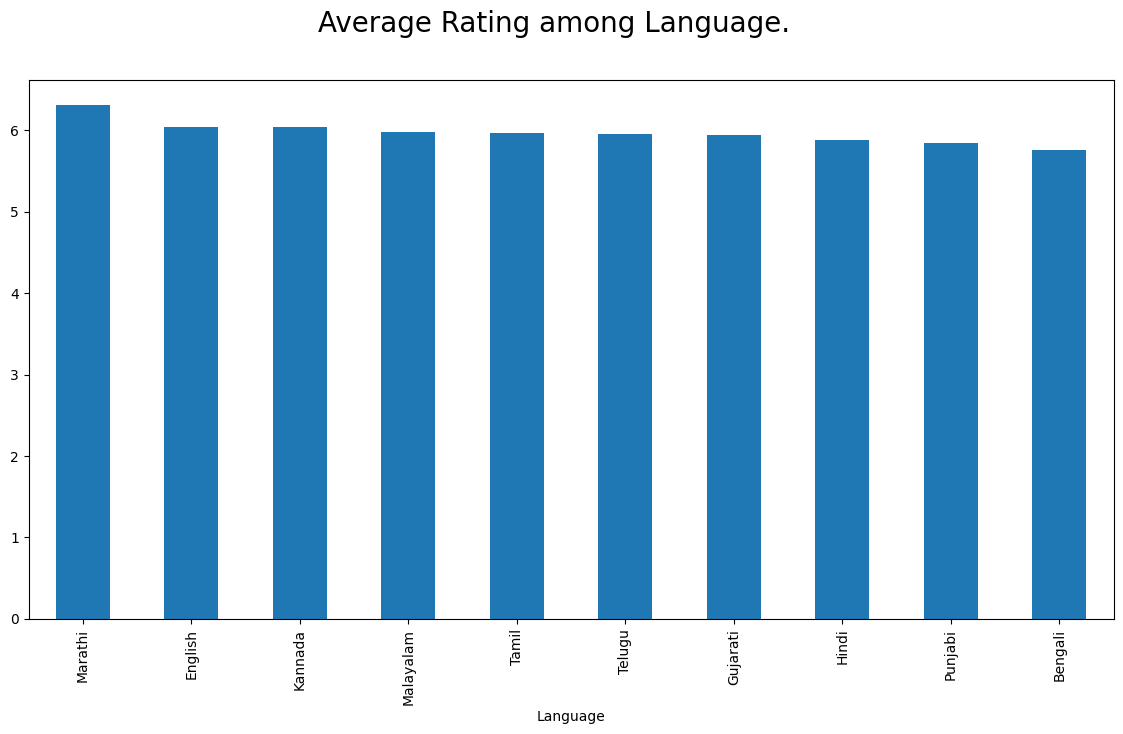

In [38]:
avg_rating_by_language.plot(kind='bar',figsize=(14,7))
plt.suptitle('Average Rating among Language.',fontsize=20)

In [39]:
avg_rating_by_maturity=dataset.groupby('Maturity Rating')['IMDb Rating'].mean().sort_values(ascending=False)
avg_rating_by_maturity

Maturity Rating
All    6.229285
18+    6.061511
7+     5.967568
13+    5.867613
16+    5.848168
NR     5.761441
Name: IMDb Rating, dtype: float64

Text(0.5, 0.98, 'Average Rating By Maturity')

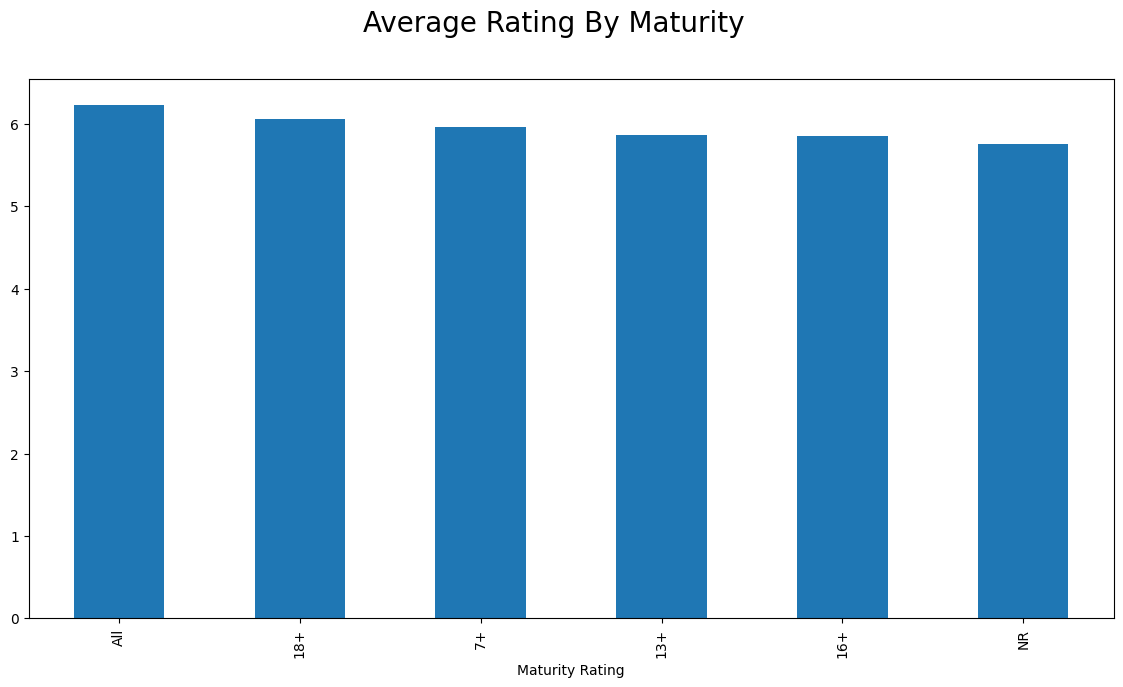

In [40]:
avg_rating_by_maturity.plot(kind='bar',figsize=(14,7))
plt.suptitle('Average Rating By Maturity',fontsize=20)

In [41]:
year_wise_language_film=dataset.groupby('Language')['Year of Release'].count().reset_index()
year_wise_language_film

,Language,Year of Release
0,Bengali,1201
1,English,1699
2,Gujarati,114
3,Hindi,1982
4,Kannada,419
5,Malayalam,518
6,Marathi,353
7,Punjabi,133
8,Tamil,721
9,Telugu,987


Text(0.5, 0.98, 'Language wise film release')

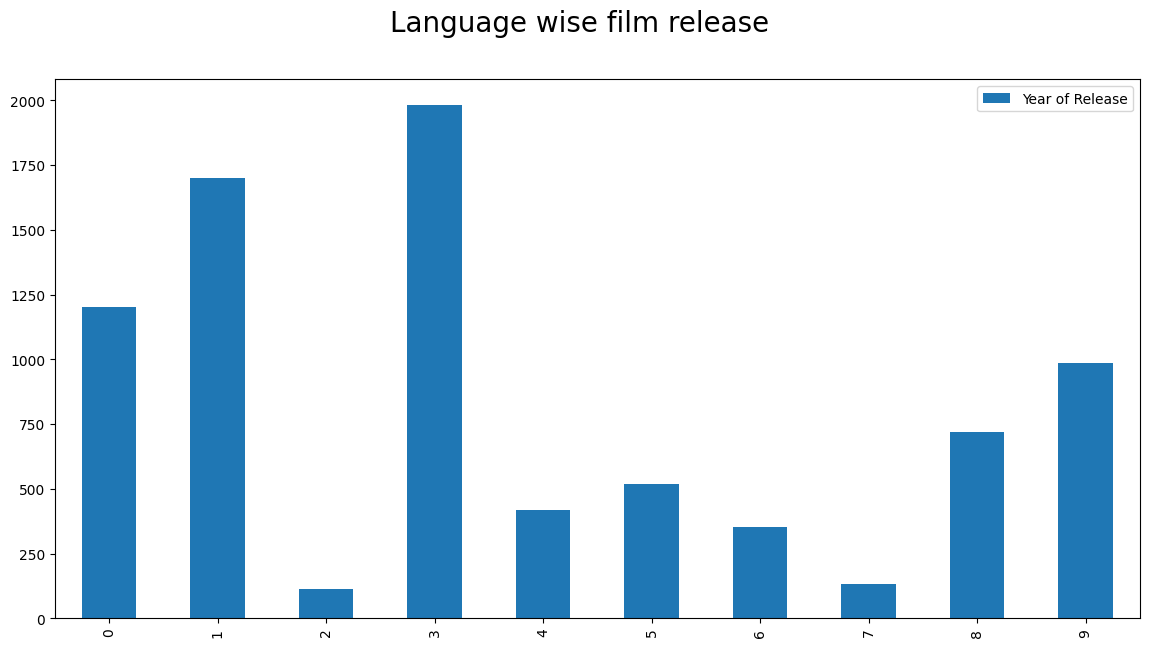

In [42]:
year_wise_language_film.plot(kind='bar',figsize=(14,7))
plt.suptitle('Language wise film release',fontsize=20)

In [43]:
maturity_rating_film_rating_wise=dataset.groupby('Maturity Rating')['IMDb Rating'].count().reset_index()
maturity_rating_film_rating_wise

,Maturity Rating,IMDb Rating
0,13+,2606
1,16+,382
2,18+,1138
3,7+,185
4,All,1762
5,NR,2054


Text(0.5, 0.98, 'Maturity wise rating')

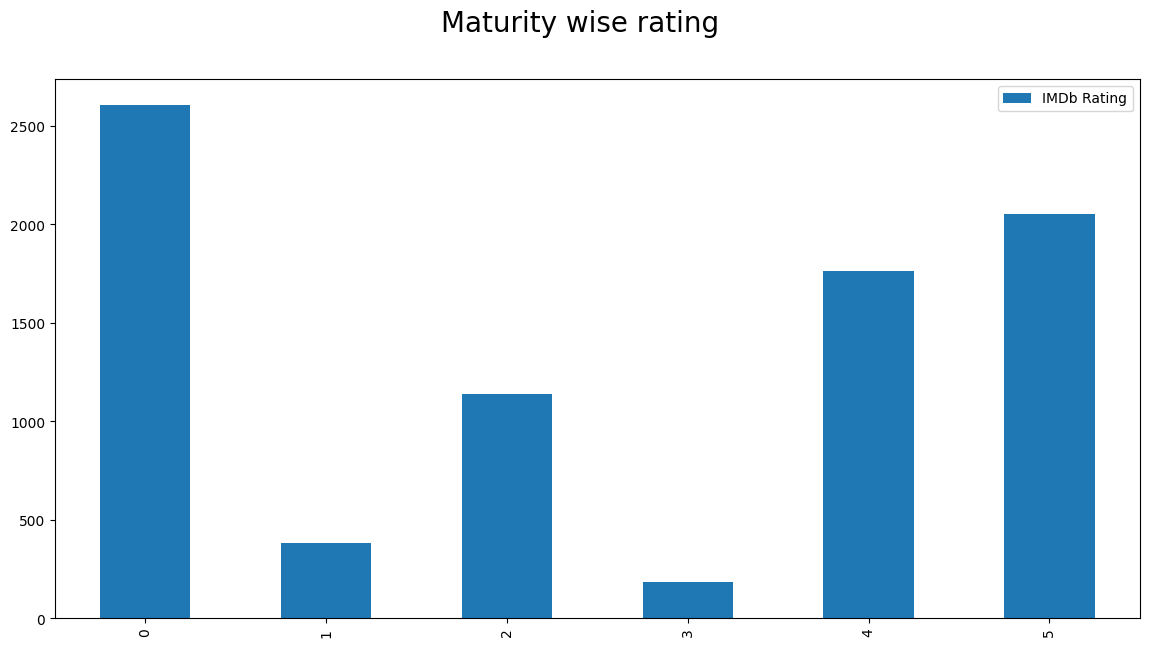

In [44]:
maturity_rating_film_rating_wise.plot(kind='bar',figsize=(14,7))
plt.suptitle('Maturity wise rating',fontsize=20)

# Correlating the dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_2688\1002614545.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlating the dataset')

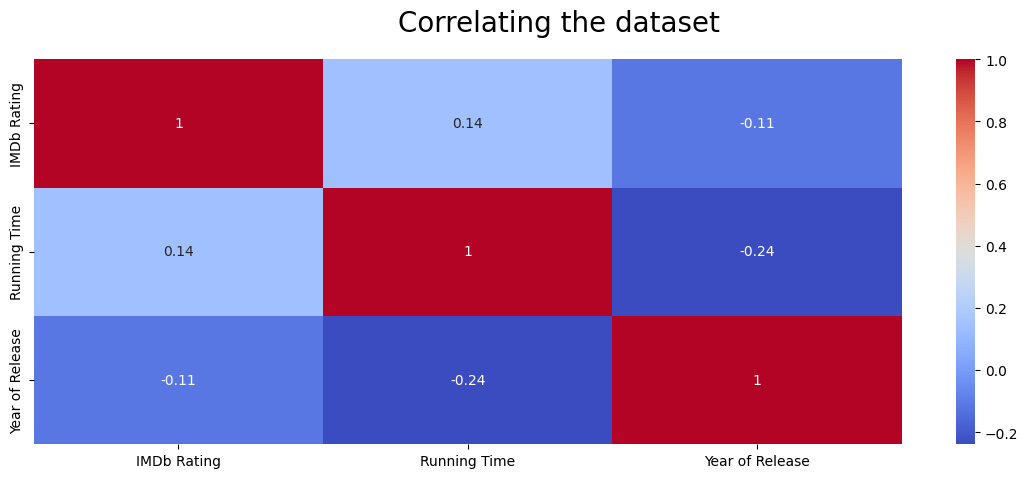

In [45]:
plt.figure(figsize=(14,5))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlating the dataset',fontsize=20)

# Comapring Multiple Data in the Dataset.

Text(0.5, 0.98, 'Maturity Rating along with language')

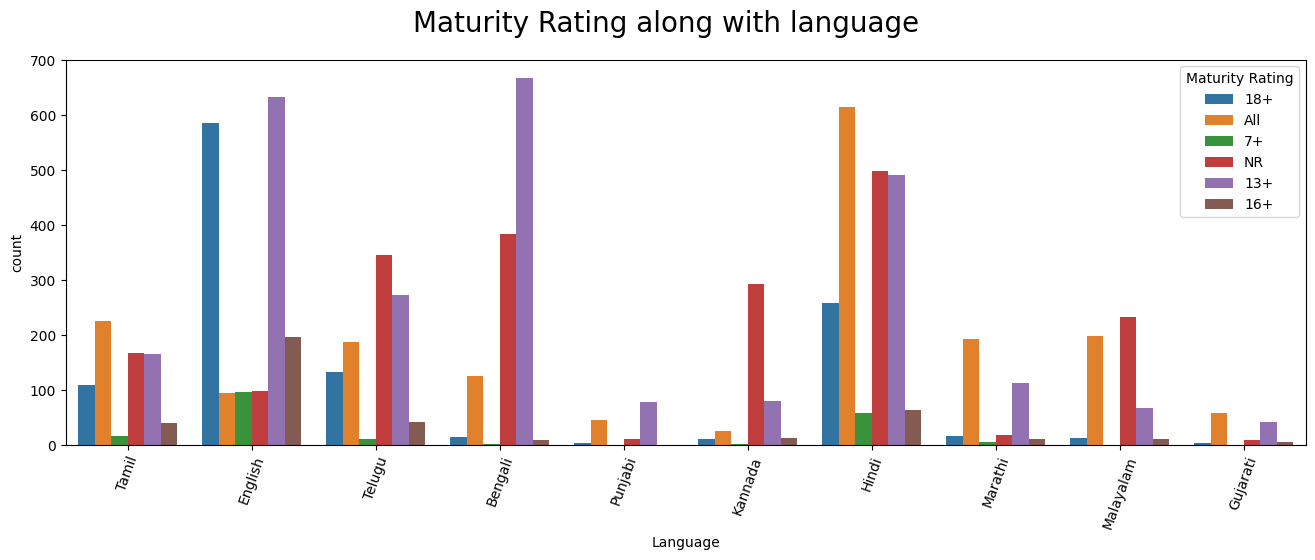

In [46]:
plt.figure(figsize=(16,5))
sns.countplot(data=dataset,x='Language',hue='Maturity Rating')
plt.xticks(rotation=70)
plt.suptitle('Maturity Rating along with language',fontsize=20)

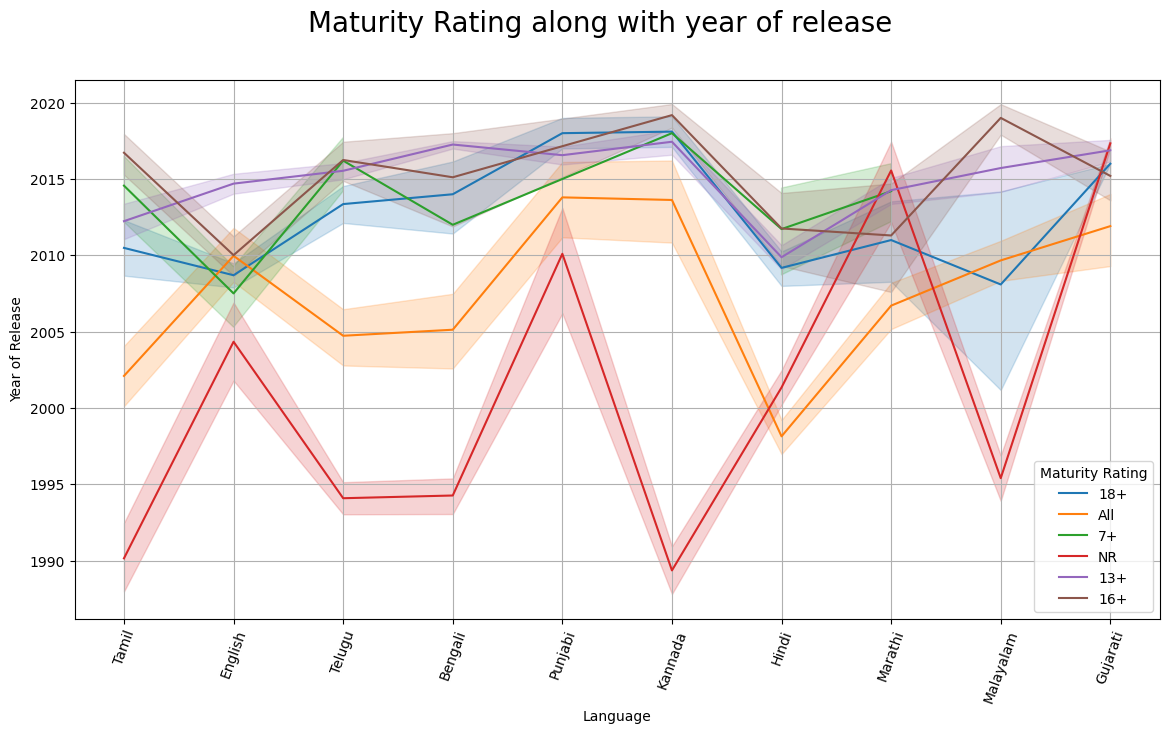

In [47]:
plt.figure(figsize=(14,7))
sns.lineplot(data=dataset,x='Language',y='Year of Release',hue='Maturity Rating')
plt.xticks(rotation=70)
plt.suptitle('Maturity Rating along with year of release',fontsize=20)
plt.grid()

As of the above chart we can see that the English language has the most 18+,7+ and 16+ rated films, Hindi has the most ALL age and NR rated films, Bengali has the most of 13+ rated film, released between 2000-2020.

Text(0.5, 0.98, 'IMDb Rating along with language')

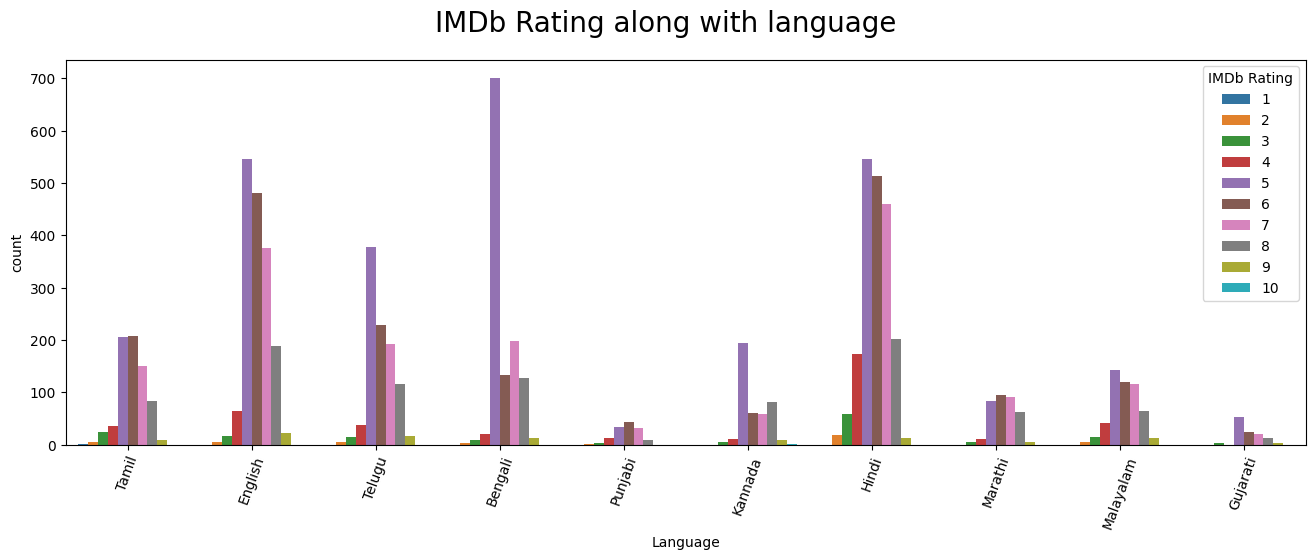

In [48]:
plt.figure(figsize=(16,5))
sns.countplot(data=dataset,x='Language',hue='IMDb Rating')
plt.xticks(rotation=70)
plt.suptitle('IMDb Rating along with language',fontsize=20)

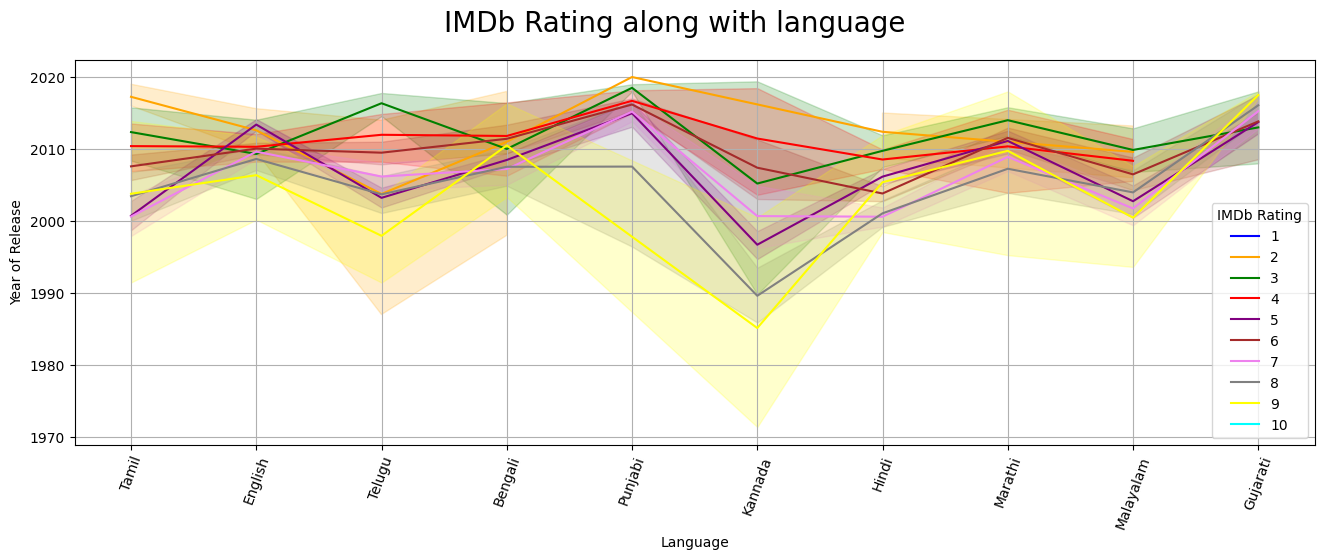

In [49]:
plt.figure(figsize=(16,5))
custom_palette = ['Blue','Orange','Green','Red','Purple','Brown','violet','Gray','Yellow','Cyan']
sns.lineplot(data=dataset, x='Language', y='Year of Release', hue='IMDb Rating', palette=custom_palette)
plt.xticks(rotation=70)
plt.suptitle('IMDb Rating along with language', fontsize=20)
plt.grid()

# Feature Engineering

In [50]:
dataset['IMDb_Rating'] = pd.to_numeric(dataset['IMDb Rating'], errors='coerce')
bins = [0, 5, 7, 10]
labels = ['Low', 'Medium', 'High']
dataset['IMDb_Rating_SMH'] = pd.cut(dataset['IMDb_Rating'], bins=bins, labels=labels)

In [51]:
running_time_bins = [0, 60, 120, 180, 300]
running_time_labels = ['Short', 'Medium', 'Long', 'Very Long']
dataset['Running_Time_SMH'] = pd.cut(dataset['Running Time'], bins=running_time_bins, labels=running_time_labels)

In [52]:
dataset

,Movie Name,Language,IMDb Rating,Running Time,Year of Release,Maturity Rating,Plot,IMDb_Rating,IMDb_Rating_SMH,Running_Time_SMH
0,John Rambo,Tamil,7,86.0,2008,18+,"In Thailand, John Rambo joins a group of merce...",7,Medium,Medium
1,American Pie,English,7,95.0,1999,18+,You'll never look at warm apple pie the same w...,7,Medium,Medium
2,Bombshell,English,7,108.0,2019,18+,"The provocative real story of three smart, amb...",7,Medium,Medium
3,Love Birds,Tamil,5,160.0,1996,All,"After accidentally meeting, Mridula (Nagma) an...",5,Low,Long
4,Hippi,Telugu,5,140.0,2019,18+,Hippi is about the live-in relationship betwee...,5,Low,Long
...,...,...,...,...,...,...,...,...,...,...
8122,Blackout,English,5,91.0,2014,18+,This ensemble thriller tells the story of four...,5,Low,Medium
8123,Loafer,Hindi,6,123.0,1973,All,Loafer Is A Bollywood Romantic Drama Hindi Mov...,6,Medium,Long
8124,Remember Me,English,7,112.0,2010,13+,Two people scarred by grief find happiness in ...,7,Medium,Medium
8125,Khopa,Marathi,5,124.0,2017,13+,Narya who comes from a loving and respected fa...,5,Low,Long


# ----- THE END -----